# **Customer Churn Prediction**


# 1.1 Importing libraries

- `Pandas` : Dataa Acquistion
- `Numpy` : Mathematiccal computations
- `Tensorflow` : model selection, accuracy, train-test split

In [3]:
import numpy as np
import pandas as pd

# 1.2 Data Acquisition  

In [4]:
df = pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [9]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


# 1.3 Data Conversion

In [10]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


# 1.4 Dropping columns

In [11]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.1 Scaling values

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# 2.2 Neural Network Architecture
 - Model - `Sequentail`
 - I/P features - `11`
 - First Layer parameters - `(11 x 11) + 11 = 132`
 - Second Layer parameters - `(11 x 9) + 9 = 108`
 - O/P Layer parameters - `(9 x 1) + 1 = 10`

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(11, activation='sigmoid', input_dim=11))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250 (1000.00 B)

 Trainable params: 250 (1000.00 B)

 Non-trainable params: 0 (0.00 B)

# 2.3 Model Compilation and Fitting

In [19]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(x_train, y_train, batch_size=42, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3629 - loss: 0.7798 - val_accuracy: 0.7987 - val_loss: 0.5323
Epoch 2/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7856 - loss: 0.5262 - val_accuracy: 0.7987 - val_loss: 0.4963
Epoch 3/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: 0.4984 - val_accuracy: 0.7987 - val_loss: 0.4952
Epoch 4/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7953 - loss: 0.5006 - val_accuracy: 0.7987 - val_loss: 0.4949
Epoch 5/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7963 - loss: 0.4999 - val_accuracy: 0.7987 - val_loss: 0.4946
Epoch 6/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4924 - val_accuracy: 0.7987 - val_loss: 0.4945
Epoch 7/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7872 - loss: 0.5118 - val_accuracy: 0.7987 - val_loss: 0.4939
Epoch 8/100
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7886 - loss: 0.5098 - val_accu

# 2.4 Prediction

In [24]:
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred.round())

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.8035

# 3.0 Results of training on weights

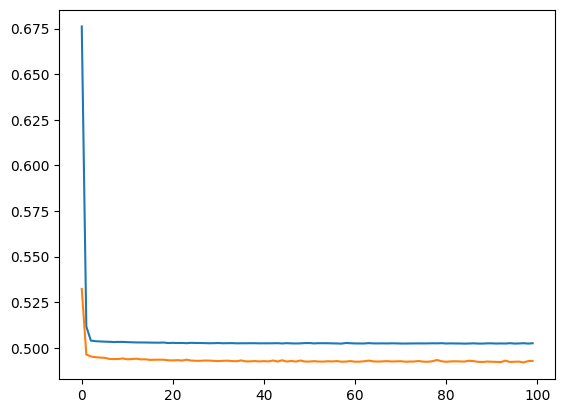

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

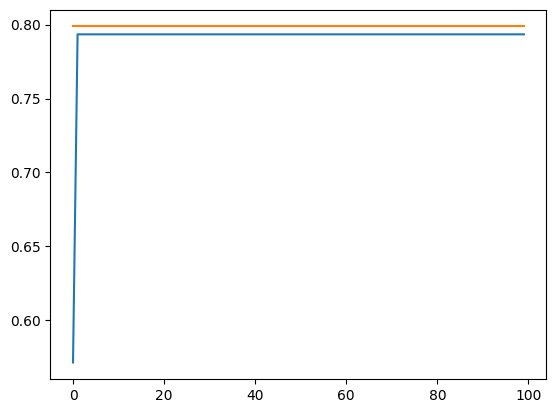

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# 4.0 Importing model

In [27]:
import pickle

with open('model.pkl', 'wb') as file:
  pickle.dump(history, file)

`End of Notebook`